# Color Widget

This example collaborates the [color classification](https://github.com/ml5js/ml5-library/tree/main/examples/p5js/NeuralNetwork/NeuralNetwork_color_classifier) in `ml5.js` and [color chooser](https://aaronwatters.github.io/jp_doodle/color_chooser.html) in `jp_doodle`. First, a color classifier will be trained on dataset `colorData.json`, then a canvas displaying chooser element will be created.

In [1]:
from ml5_ipynb import ml5_nn
from jp_doodle import dual_canvas
import re
from IPython.display import display

In [2]:
nn = ml5_nn.neuralNetwork()
nn.options['dataUrl'] = 'data/colorData.json'
nn.options['inputs']=['r','g','b']
nn.options['outputs'] = ['label']
nn.options['task'] = 'classification'
nn.options['debug']=True
nn.initialize_framework()

..........Model is created


In [3]:
nn.normalize_data()
trainingOptions = {'epochs': 20, 'batchSize' : 64}
nn.train_data(trainingOptions)

............................................................................................................................................done


The following cell initializes an empty canvas object with the width of 200 and height of 120. 

In [4]:
demo = dual_canvas.DualCanvasWidget(width=200, height=120)
demo

DualCanvasWidget(status='deferring flush until render')

After running the following cell, the color widget will be displayed in the previous cell output.   

You will see three elements on canvas, a black circle with a predict label, a black circle with a true label, and a square containing a colorful triangle in the center position, a circle demonstrating current rgb value at the upper left and a rectangle demonstrating picked color below the triangle. When you click the triangle, you are picking a rgb value. Once you pick a color, you can move to the black circle with true label. A predicted color will be displayed in the circle with predict label. 

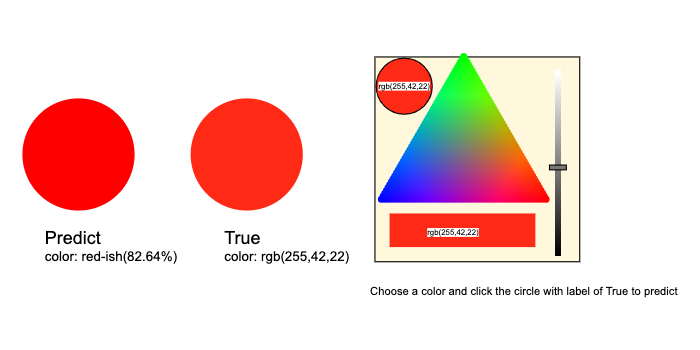

In [5]:
def get_color(color):
    print(color)
    r, g, b = list(map(int, re.findall(r'\d+', color)))
    test_color = {'r': r, 'g': g, 'b': b}
    nn.classify_data(test_color)
    predict_dict = nn.classify_callback_list[-1][0]
    label = predict_dict['label']
    confidence = round(predict_dict['confidence']*100,2)
    predict_color = label.split('-')[0]
    demo.js_init("""
        element.transition("Predict", {color: predict_color});
        element.transition("predict_color", {text: "color: "+label+"("+confidence+"%)"});
    """,predict_color=predict_color, label=label, confidence=confidence)

demo.js_init("""
    // Attach a dual canvas associated with the element as a child of the element
    // configured with width 400 and height 200.
    var config = {
                width: 700,
                height: 350,
            };
    element.dual_canvas_helper(config);

    // Draw some named elements on the canvas.

    element.circle({
        name: "Predict", x:50, y:150, r:50, 
        color:"Black", lineWidth: 14});

    element.circle({
        name: "True", x:200, y:150, r:50, 
        color:"Black", lineWidth: 14});

    // A magenta text string display named Pluto
    element.text({
        name: "predict_text", text: "Predict", font: "16px Arial",
        x: 20, y:70, color:"Black"
    })
    element.text({
        name: "predict_color", text: "Color: ", font: "12px Arial",
        x: 20, y:55, color:"Black"
    })
    
    element.text({
        name: "true_text", text: "True", font: "16px Arial",
        x: 180, y:70, color:"Black"
    })
    element.text({
        name: "true_color", text: "Color: ", font: "12px Arial",
        x: 180, y:55, color:"Black"
    })

    // Position a color chooser on the canvas.
    var chosen_color = null;

    element.color_chooser({
        x: 310, y: 50, side:200, font: "normal 7px Arial",
        callback: function(color_array, color_string) { chosen_color = color_string; }
    });

    // mouse tracker circle (initially hidden)
    var tracker = element.circle({
        name:"mouse_track", r:5,
        events: false,  // This object is invisible to events.
        x:0, y:0, color:"black", hide:true});

    element.text({
        x: 310, y:25, name: "explanation",
        text: "Choose a color and click the circle with label of True to predict",
    })

    // Center and scale the figure to fit in the available area.
    element.fit(null, 20)

    var on_mouse_move = function(event) {
        var name = event.canvas_name;
        var location = element.event_model_location(event);
        if ((chosen_color) && (name) && (location.x < 310)) {
            tracker.change(
                    {hide:false, x:location.x, y:location.y, color:chosen_color});
        if (event.type == "click") {
            element.transition("True", {color: chosen_color});
            element.transition("true_color", {text: "color: "+chosen_color});
            get_color(chosen_color);
            }
        } else {
            tracker.change({hide: true});
        }
    };
    element.on_canvas_event("mousemove", on_mouse_move);
    element.on_canvas_event("click", on_mouse_move);

""", get_color = get_color)